In [1]:
# Kapitel 5: Maschinenlernen
# Viele Maschinenlern-Anwendungen in Python basieren auf der Scikit-Learn Bibliothek

# - https://scikit-learn.org/stable/

# Maschinen lernen besteht daraus, Modelle zu bauen, die dabei helfen, Daten zu verstehen
# >> der Lernaspekt umfasst das Vorhersagen von Daten auf der Basis von beobachtbarer Variablen, die dann für weitere 
#    Vorhersagen verwendet werden können

# Es gibt zwei (einhalb) Kategorien von Maschinenlernen:
# - Supervised Maschinenlernen: ein kodierter Datensatz wird in Trainings- und Testdatensatz unterteilt, um mit Hilfe 
#   von statistischen Modellen (Classification, Regression etc.) eine bereits kodierte Zielvariable vorherzusagen
#   e.g. Classification: EMail mit Label Spam und Nicht-Spam, Datensatz mit Wortfrequenzen > Modell, dass Spam anhand der Daten vorhersagt
#   e.g. Regression: Vorhersage der Distanz eines Planeten anhand der Leutkraft auf einer Farbwellenlänge vorhersagen

# - Unsupervised Maschinenlernen: Versucht anhand der Daten (features) zugrundeliegende Strukturen zu entdecken >> Das Ergebnis
#   ist eine neue Variable, die dann weiter vorhergesagt werden kann (Clustering, Dimensionality Reduction)

# - Semisupervised Maschinenlernen: wird verwendet, wenn unvollständige Label vorliegen


# X Scikit-Learn Intro
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.head())

# - Die Reihen einer Matrix werden als samples bezeichnet und die Anzahl der Reihen als n_samples
# - Die Spalten werden als Features bezeichent und die Anzahl der Spalten als n-features
# >> Datensätze, wie der vorliegende, werden als feature matrix bezeichnet (zweidimensionale Arrays mit [n_samples, n_features])
#    per Konvention wird diese oft mit X bezeichnet, und ist ein NumPy array, Pandas DataFrame oder (selten) eine SciPy sparse matrix
# >> Außerdem gibt es ein Label (target array, y), das die AV im Modell widerspieltert, iR. ist dieser ein NumPy array oder 
#    eine Pandas Series

# Visualisierung der Korrelation zwischen den features mit species als dritte Dimension
%matplotlib inline
# sns.pairplot(iris, hue='species', height=1.5)

# Für Scikit-Learn werden die feature matrix und der target array voneinander getrennt
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)

y_iris = iris['species']
print(y_iris.value_counts())


# Scikit Learn Estimator API
# https://arxiv.org/abs/1309.0238

# Das Scikit Learn Application Programming Interface hat die befolgt folgende Prinzipien:
# - Consistency (Alle Objekte haben ein gemeinsames Interface und teilen eine limitierte Anzahl an Methoden mit konseq. Dokumentation)
# - Inspection (Alle Paremeter sind zugängliche Attribute)
# - Limited Objekt Hierarchy (Datensätze haben gängige Formate und Parameter sind standard Python strings)
# - Composition (Viele Maschinlernalgorithmen sind eine Kombination aus grundlegenderen Algorithmen)
# - Sensible Default (Wenn immer möglich, gibt es einen sinnvollen Default Wert)

# X Schritte zur Verwendung von Scikit-Learn
# 1) Eine geeignete Model-Klasse auswählen und von Scikit-Learn importieren
# 2) Objekt der Klasse erstellen und Modell(hyper)parameter festlegen
# 3) Daten in feature matrix und target vector zerlegen
# 4) Fit the Model to the data, indem fit() verwendet wird
# 5) Model auf einen neuen Datensatz anwenden (predict() für supervized; transform() oder infer() für unsupervized)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 4)
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


(50, 1)
[1.9776566]
-0.9033107255311164


Text(11, 18, 'Vorhersagegerade')

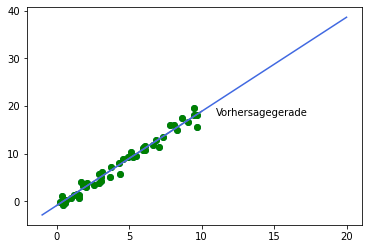

In [2]:
# X Beispiel I - supervised learning: Lineare (einfach) Regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x-1 + rng.randn(50)

plt.scatter(x, y)

# Schritte für die Vorhersage:
# 1) Modell Klasse auswählen und impórtieren

from sklearn.linear_model import LinearRegression
# >> Auch allgemeinere Modelle stehen zur Verfügung
# https://scikit-learn.org/stable/modules/linear_model (nachlesen!)


# 2) Objekt der Klasse erstellen und Modell(hyper)parameter festlegen
# Bei dem erstellen eines Objekts einer Model-Klasse stehen vielen Entscheidungen offen
# - Intercept (ja? nein?), Normalisierung des Models?, Feature Preprocessing?, Art der Regularisierung des Modells, 
#   Anzahl der Modellparameter etc.

model = LinearRegression(fit_intercept=True) # legt fest, dass eine Intercept berechnet wird


# 3) Daten in feature matrix und target vector zerlegen
# Während y schon als array vorliegt, muss x noch in eine zweidimensionale Matrix gewandelt werden
X = x[:, np.newaxis]
print(X.shape)

# 4) Fit the Model to the data, indem fit() verwendet wird
model.fit(X, y) # wendet das Modelobjekt (lineare Regression an X = UV's, y = AV)
# > Die Ergebnisse der Berechnung werden in Modelattributen, die in Scikit-Learn per Konvention mit _ enden
print(model.coef_)
print(model.intercept_)

# Regressionsgerade, die sich aus den Modellparametern ergibt
x2 = np.linspace(0, 10, 20)
y2 = (x2*1.978 - 0.9)
plt.plot(x2, y2, color="grey")

# Fitparameter, Signfikanzwerte und Konfidenzintervalle werden bei Scikit-Learn nicht berechnet, da diese für die Vorhersage-Ziele
# von Data Science wenig relevant sind. >> Diese können mit dem StatsModels Paket berechnet werden https://sourceforge.net/projects/statsmodels/


# 5) Model auf einen neuen Datensatz anwenden (predict() für supervized)
# Das Model soll nun die Werte von y für einen anderen Datensatz vorhersagen

xfit = np.linspace(-1, 20)
# Diese müssen wieder in eine Feature matrix umgewandelt werden
xfit = xfit[:, np.newaxis]
yfit = model.predict(xfit)

# Visualisierung des Modells mit Regressionsgerade
fig = plt.Figure
plt.scatter(x, y, color = "green")
plt.plot(xfit, yfit, color = "royalblue")
plt.annotate(text='Vorhersagegerade', xy= (11, 18))


In [3]:
# X Beispiel II - Supervised Learning: Iris Klassifizierung

# Ziel Vorhersage der Blumenart des Iris-Datensatzes anhand der Klassifizierung durch ein Gaussian Naive Bayes Model
# >> dieses nimmt an, dass jede Klasse von einer achsen-bezogenen (axis-aligned) Normalverteilung gezogen wird
# >> wird oft als Basis-Model für Klassifizierung verwendet (keine hyperparameter)

# 0) Vorbereitung: Datensatz in ein Test- und Trainingsset unterteilen
from sklearn.model_selection import train_test_split
import seaborn as sns


Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                               random_state = 1)
print(Xtrain.head())
print(Xtrain.shape)

# 1) Import Model-Klasse
from sklearn.naive_bayes import GaussianNB

# 2) Objekt erstellen
model = GaussianNB()

# 3) Auf Trainingsdaten anwenden
model.fit(Xtrain, ytrain)

print(model.class_count_) # keine Label?
print(model.class_prior_)

# 4) Ausprägung für Testdaten vorhersagen
y_model = model.predict(Xtest)

# 5) vorhersage überprüfen
from sklearn.metrics import confusion_matrix, accuracy_score

conf = pd.DataFrame(confusion_matrix(ytest, y_model, labels=['setosa', 'versicolor', 'virginica']))
conf.columns = ['setosa_p', 'versicolor_p', 'virginica_p']
conf.index = ['setosa', 'versicolor', 'virginica']
print('\n')
print(conf)
print('\n')

print(accuracy_score(ytest, y_model)) # 97% accuracy
# (13 + 15 + 9)/38 # richtig/gesamt

     sepal_length  sepal_width  petal_length  petal_width
54            6.5          2.8           4.6          1.5
108           6.7          2.5           5.8          1.8
112           6.8          3.0           5.5          2.1
17            5.1          3.5           1.4          0.3
119           6.0          2.2           5.0          1.5
(112, 4)
[37. 34. 41.]
[0.33035714 0.30357143 0.36607143]


            setosa_p  versicolor_p  virginica_p
setosa            13             0            0
versicolor         0            15            1
virginica          0             0            9


0.9736842105263158


[4.22824171 0.24267075 0.0782095  0.02383509]


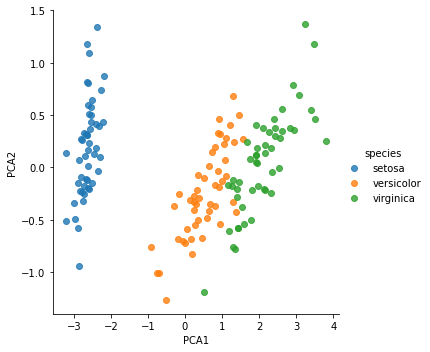

In [4]:
# X Beispiel III - Unsupervised Learning: Iris Dimensionality

# Versuch die vier Dimensionen der Irisfeatures auf einige übergeordnete Faktoren zu reduzieren
# >> mit Principal Component Analysis

# 1) import Model Klasse
from sklearn.decomposition import PCA

# 2) Objekt mit Hyperparametern erstellen
model = PCA()
model.fit(X_iris)

print(model.explained_variance_) # Gibt eigenvalues > Würde einen Faktor vorschlagen...
# >> in der Aufgabe werden aber zwei extrahiert

model = PCA(n_components=2)

# 3) Das Model auf die Daten anwenden
model.fit(X_iris)

# 4) Faktorausprägung zuordnen/ Transformiere die Daten in zwei Dimensionen
X_2D = model.transform(X_iris)
# >> Dem DataFrame zuordnen
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

# Visualisieren, um ERgebnisse zu verdeutlichen
sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris, fit_reg=False)

# - Test mit einem Faktor
# model2 = PCA(n_components=1)
# model2.fit(X_iris)
# X_1D = model.transform (X_iris)

# iris['PCA1_X'] = X_1D[:,0]
# print(iris.head())

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.scatter(iris['species'], iris['PCA1_X'])

   sepal_length  sepal_width  petal_length  petal_width species      PCA1  \
0           5.1          3.5           1.4          0.2  setosa -2.684126   
1           4.9          3.0           1.4          0.2  setosa -2.714142   
2           4.7          3.2           1.3          0.2  setosa -2.888991   
3           4.6          3.1           1.5          0.2  setosa -2.745343   
4           5.0          3.6           1.4          0.2  setosa -2.728717   

       PCA2  cluster  
0  0.319397        0  
1 -0.177001        0  
2 -0.144949        0  
3 -0.318299        0  
4  0.326755        0  


cluster      0   1   2
species               
setosa      50   0   0
versicolor   0  45   5
virginica    0   0  50


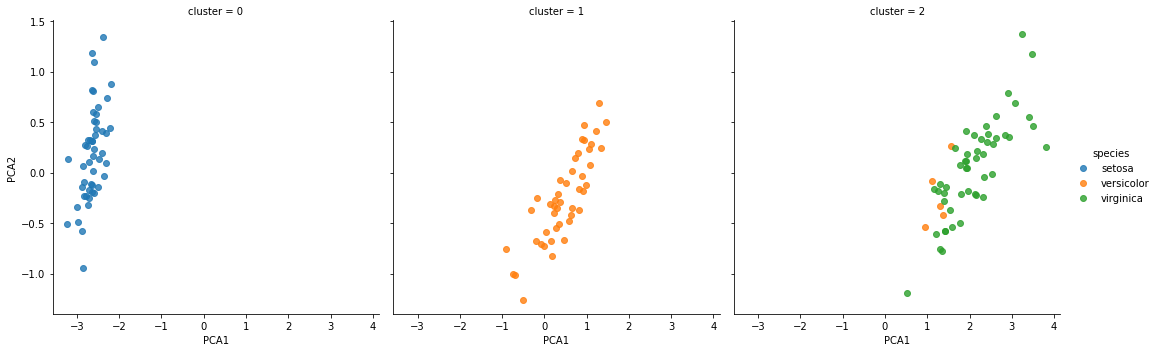

In [5]:
# X Beispiel IV - Unsupervized Learning: Iris Clustering
# Clusteralgorithmen versuchen intern homogene und extern heterogene Gruppen zu finden
# Hier wird der Gaussian Mixed Method Algorithmus verwendet (GMM) verwendet

# 1) Model importieren 
from sklearn.mixture import GaussianMixture

# 2) Objekt mit Hyperparametern erstellen
model = GaussianMixture(n_components=3,
           covariance_type='full')

# 3) Model für Daten berechnen
model.fit(X_iris)

# 4) Clusterlabel vorhersagen
y_gmm = model.predict(X_iris)

# Vorhersage prüfen
iris['cluster'] = y_gmm
print(iris.head())
print('\n')
print(pd.crosstab(iris['species'], iris['cluster']))

# Visualisieren
sns.lmplot(x='PCA1', y='PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

(1797, 8, 8)


(1797, 64)


(1797,)


C:\Users\Manue\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Manue\anaconda3\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


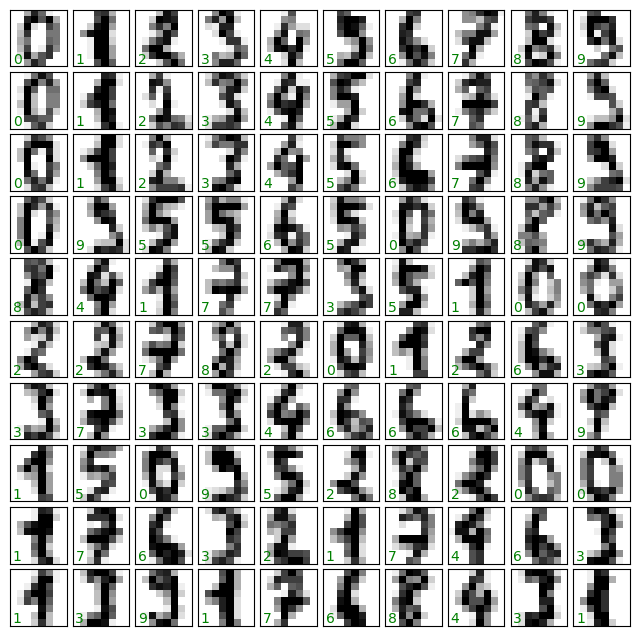

In [5]:
# X Anwedungsbeispiel: Handschriftliche Zahlen identifizieren
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.images.shape)

# Die ersten 100 Bilder generieren
import matplotlib.pyplot as plt

# Erstellt den Grid, mit 10X10, in gewisser Größer
fig, axis = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

# Gibt jedes Bild
for i, ax in enumerate(axis.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    # printed den codierten Vektor unten links im Bild
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')
    
    
# Um eine Vorhersage zu treffen, wird eine feature_matrix[n_samples, n_features] benötigt
# >> Dafür wird jeder Pixel im Bild als feature betrachtet, indem das Bild ausgeflacht wird und so ein array mit 64 Stellen entsteht

# digits.data enthällt den ausgeflachten Array
X = digits.data
print('\n')
print(X.shape)

# digits.target enthält den Zielvektor
y = digits.target
print('\n')
print(y.shape)

# - Unsupervised Learning: Dimensions reduktion
# Es wäre gut, die Datenpunkte zu visualisieren, was mit 64 Dimensionen jedoch etwas schwierig ist
# >> Daher werden diese auf zwei Dimensionen reduziert (mit Hilfe der Isomap; Manifold Learning)

# 1) Model importieren
from sklearn.manifold import Isomap
# 2) Objekt erstellen mit Hyperparametern
iso = Isomap(n_components=2)
# 3) Model berechnen
iso.fit(digits.data)
# 4) Faktoren für die Daten berechnen
data_projected = iso.transform(digits.data)
print(data_projected.shape)


C:\Users\Manue\AppData\Local\Temp\ipykernel_30812\1291287654.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


NameError: name 'train_test_split' is not defined

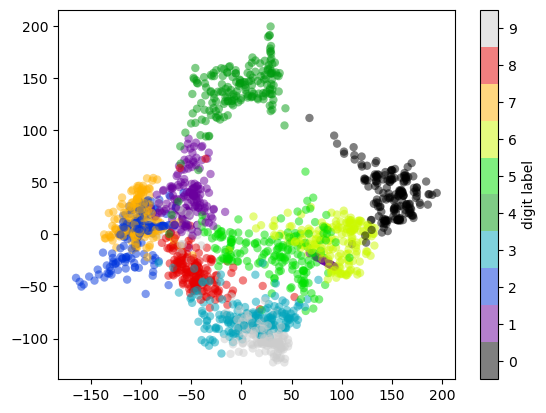

In [3]:
# Visualisieren der Daten, um Muster zu erkennen
plt.scatter(data_projected[:,0], data_projected[:, 1], c=digits.target,
           edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

# Digit Klassifizierung - Gaussian Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 1) Model-Klasse importieren
from sklearn.naive_bayes import GaussianNB

# 2) Objekt erstellen
model = GaussianNB()

# 3) Auf Daten anwenden
model.fit(X_train, y_train)

# 4) Vorhersage der Testdaten
y_predict = model.predict(X_test)


# Qualität der Vorhersage prüfen
# raw accuracy-score
print(f"\nDie Übereinstimmung beträgt {round(accuracy_score(y_true=y_test, y_pred = y_predict)*100, 2)}%\n")

# Confusion Matrix
conf = pd.DataFrame(confusion_matrix(y_test, y_predict))
conf.columns = [f"{x}_p" for x in range(10)]
conf.index = range(10)
print(conf)

<AxesSubplot:>

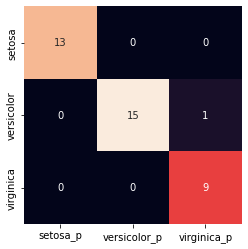

In [8]:
# Schöne Darstellung der Confusion Matrix
sns.heatmap(conf, square=True, annot=True, cbar=False)

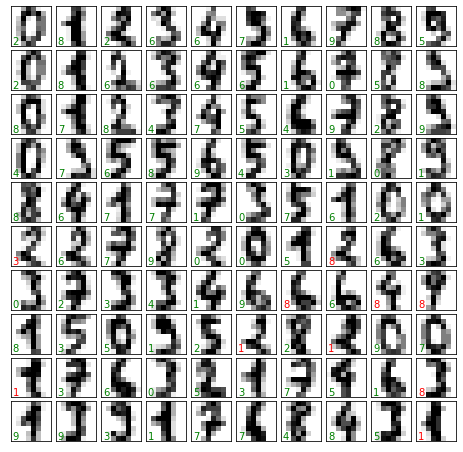

In [9]:
# Erstellt den Grid, mit 10X10, in gewisser Größer
fig, axis = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

# Gibt jedes Bild
for i, ax in enumerate(axis.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    # printed den codierten Vektor unten links im Bild
    ax.text(0.05, 0.05, str(y_predict[i]),
           transform=ax.transAxes, 
            color='green' if (y_test[i] == y_predict[i]) else "red")

In [12]:
# X Die Wahl des besten Models :D
# ... um ein geeignetes Model zu wählen, muss es eine Möglichkeit geben, die zu validieren, dass das Model und die Hyperparameter
#     für die Daten geeignet sind
# >> idR. wird dabei der Vorhersagewert mit dem bekannten tatsächlichen Werten verglichen


# - ! Der falsche Weg der Modelvalidierung !
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Erstellen eines Models mit Hyperparametern
# Dabei wird der k-neighbors classifier verwendet mit n_neighbors = 1 >> gleiche Label für nähste Nachbarn
from sklearn.neighbors import KNeighborsClassifier # 1) importieren
model = KNeighborsClassifier(n_neighbors=1) # 2) Objekt erstellen
model.fit(X, y) # 3) Model berechnen
y_model = model.predict(X) # Vorhersagewerte

print(accuracy_score(y_true=y, y_pred=y_model)) # macht den Anschein, dass alle vorhersagen richtig sind

# >> Dies liegt daran, dass die Daten anhand des selben Datensatzes trainiert und validiert wurden
# >> Außerdem ist k-neighbors ein instance-based Model, das einfach die Trainingsdaten speichert, daher
#    wird es immer 100% accuracy bei denselben Daten haben


# - Lösung: Datensatz in Trainigs- und Testset unterteilen
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,
                                               train_size=0.5)

model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

print(accuracy_score(y_true=ytest, y_pred=y_model))
# Dieser Accuracy Score ist bereits eine deutlich bessere Einschätzung der Modelgüte als der erste Score


# - Lösung2: Modelvalidierung durch Cross-validation
# ... ein Nachteil der unterteilung in Trainings- und Testset ist, dass ein Teil der Daten fürs Trainieren verloren geht

# Bei Cross-validation wird daher der Trainings- und Testdatensatz jeweils für das Training des Datensatzes verwendet
# trial 1 (trainings > Vorhersage Test); trail 2(test > vorhersage Training)
y2_model = model.fit(Xtrain, ytrain).predict(Xtest)
y1_model = model.fit(Xtest, ytest).predict(Xtrain)

print(round(accuracy_score(ytest, y2_model), 2), accuracy_score(ytrain, y1_model))

# Alternative könnte man auch den Datensatz in 5 Teile zerlegen und jeweils 4/5 nutzen um das andere 1/5tel vorherzusagen
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X, y, cv=5))

# Im Extremfall könnte nur versucht werden einen Datenpunkt vorherzusagen
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print(scores)
print(scores.mean())

1.0
0.9066666666666666
0.91 0.96
[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.96


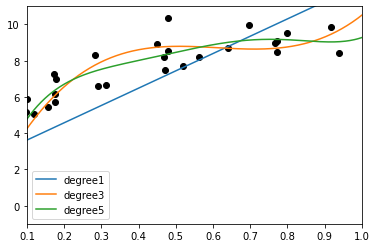

In [13]:
# X Das richtige Modell auswählen
# Die Auswahl der richtigen Parameter und Modelle ist essenziell für Datascience

# Wichtige Fragen, wenn das Modell schlecht performed:
# - Sollte ein mehr/ weniger komplexes/ flexibles Model verwendet werden?
# - Sollten mehr Trainingsdaten gesammelt werden?
# - Sollten mehr Daten gesammelt werden, um weitere Features(Variablen) zu erheben?


# X Der Bias-variance trade-off
# Aka der Trade-off zwischen under- und overfitting
# - unterfitting: Das Modell beschreibt die Datenlage nicht gut (ist zu unflexibel für den Zusammenhang) > hoher bias
# - overfitting: Das Modell hat zu viel Flexibilität > beschreibt nicht nur Zusammenhang, sondern auch Zufallsfehler > high variance

# Der Zusammenhang zwischen Komplexibilität und der Vorhersagekraft eines Modells wird in der validation Kurve beschrieben
# - Der Trainingscore ist immer höher als der Testscore
# - Für Modelle mit niedriger Komplexität ist die Vorhersagekraft für Test- und Trainingsdaten niedrig
# - für Modelle mit hoher Komplexität ist die Vorhersagekraft für Testdaten niedrig und für Trainingsdaten hoch
# >> Es entsteht ein Höhepunkt der Vorhersagekraft für die Testdaten bei mittlerer Komplexität (bestes Modell)


# X Validierungskurven in Scikit-Learn
# Beispiel mit polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

# Daten mit denen das Modell getestet wird
import numpy as np


def make_data(N, err=1.0, rseed=1):
    # random data sample
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1/  (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

# Daten erstellen
X, y = make_data(40)

# Visualisieren mit diversion polynomial fits
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree{0}'.format(degree))
plt.xlim(0.1, 1.0)
plt.ylim(-1, 11)
plt.legend(loc="best")

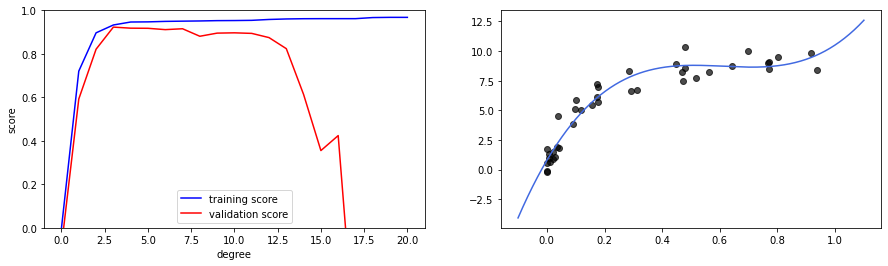

In [14]:
# Für dieses Modell und die vorliegenden Daten kann auch eine Validierungskurve geplottet werden
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                         param_name = 'polynomialfeatures__degree',
                                         param_range=degree, cv=7)
fig = plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc="best")
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

# Der beste Training/Validation Bias ist bei einem Modell dritter Ordnung zu finden
plt.subplot(1, 2, 2)
plt.scatter(X.ravel(), y, c='black', alpha=.7)
ytest = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), ytest, c='royalblue')

Text(0, 0.5, 'score')

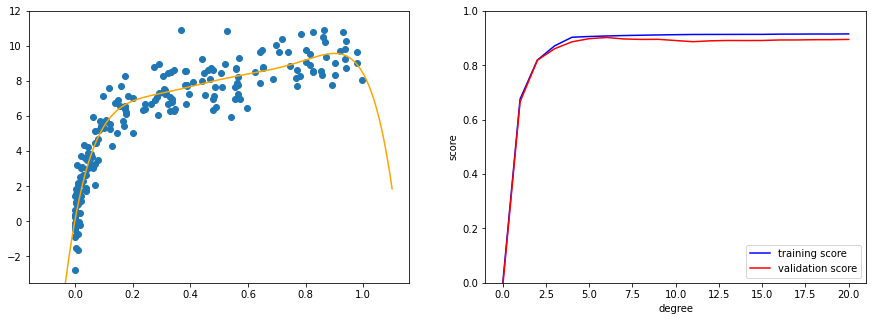

In [15]:
# Das Verhältnis von Komplexität und Vorhersagekraft hängt von der Fallzahl ab

X2, y2 = make_data(200)

fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X2.ravel(), y2)

ytest2 = PolynomialRegression(6).fit(X2, y2).predict(X_test)
plt.plot(X_test.ravel(), ytest2, c='orange')
plt.ylim(-3.5, 12)

# Nun wird noch einmal eine Lernkurve erstellt
degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X2, y2,
                                         param_name = 'polynomialfeatures__degree',
                                         param_range=degree, cv=7)
plt.subplot(1, 2, 2)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc="best")
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')
# Zeigt das das sechste Polynom die beste Erklärung der Daten darstellt

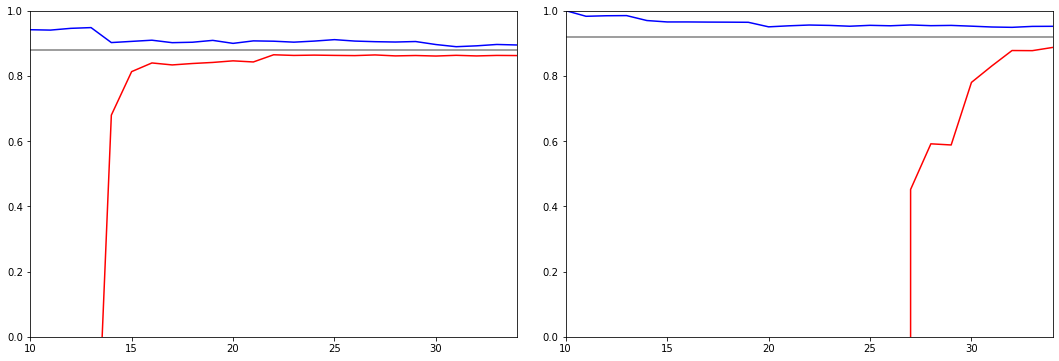

In [16]:
# Daraus wird deutlich, dass ein Modell nicht nur von der Komplexität sondern auch von der Größe der Daten abhängt
# >> Deswegen ist es sinnvoll den Trainingsscore und Validation-Score eines Modells gegen die Teilnehmerzahl zu plotten

# Dies wird als eine Lernkurve bezeichnet:
# - Ein Modell mit einer gegebenen Komplexität wird einen kleinen Datensatz overfitten
# - Ein Modell mit einer gegebenen Komplexität wird einen großen Datensatz underfitten
# >> Das heißt die Kurven nähern sich an mit steigender Fallzahl

from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right = 0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training_score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation_score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])


{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}


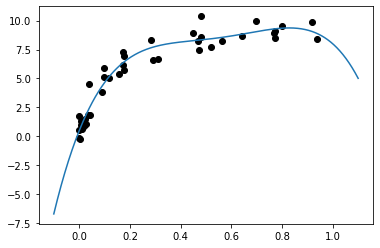

In [17]:
# Bei mehr features wird die Lernkurve schnell zu komplex und mehrdimensional, um visualisiert zu werden
# Für die Regression, gibt es in Python allerdings eine Methode, die automatisch, die beste Ordnung auswählt und mitteilt,
# ob die Daten normalisiert werden sollten und ob ein Intercept gefittet werden soll

# X GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = dict(polynomialfeatures__degree=np.arange(21),
                 linearregression__fit_intercept=[True, False])

grid = GridSearchCV(estimator=PolynomialRegression(), param_grid= param_grid, cv=7)
# Überprüfen, was für die Daten am besten geeignet ist
grid.fit(X, y)
print(grid.best_params_)

# Wählt bestes Model aus
model = grid.best_estimator_
plt.scatter(X.ravel(), y, c='black')

# sagt y auf Basis des besten Modells vorher
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)

       0  1  2  3  4
0  85000  4  1  0  0
1  75000  3  0  1  0
2  85000  3  0  0  1
3  85000  2  0  1  0
['price' 'rooms' 'neighborhood=Queen Anne' 'neighborhood=Fremont'
 'neighborhood=Wallingford']


   price  rooms neighborhood
0  85000      4   Queen Anne
1  75000      3      Fremont
2  85000      3  Wallingford
3  85000      2      Fremont
   price  rooms neighborhood  Fremont  Queen Anne  Wallingford
0  85000      4   Queen Anne        0           1            0
1  75000      3      Fremont        1           0            0
2  85000      3  Wallingford        0           0            1
3  85000      2      Fremont        1           0            0 

   evil  horizon  of  problem  queen
0     2        0   1        1      0
1     1        0   0        0      1
2     1        1   0        1      0


       evil   horizon        of   problem     queen
0  0.684993  0.000000  0.579897  0.441027  0.000000
1  0.508542  0.000000  0.000000  0.000000  0.861037
2  0.425441  0.720333  0.00000

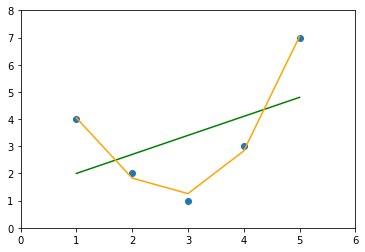

In [127]:
# X Feature Engineering
# Die Voraussetzung für alle Modelle sind saubere Daten in einem [n_samples, n_features] Format
# >> Gelegentlich müssen Informationen dafür in eine Analysierbare Form gebracht werden, dies ist Feature Engineering

# - Categorical Features
# Bei kategorischen Daten könnte man, auf diese Idee kommen, diese als eine Skale mit Zahlenwerten zu belegen
# > Dies ist für SciKit Learn jedoch problematisch, da diese stets mit algebraischer Funktionalität (1 < 2 < 3) gedacht werden
# > Besser ist daher eine Dummy-Kodierung, e.g. mit DictVectorize

data = [{'price': 85000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
        {'price': 75000, 'rooms': 3, 'neighborhood': 'Fremont'},
        {'price': 85000, 'rooms': 3, 'neighborhood': 'Wallingford'},
       {'price': 85000, 'rooms': 2, 'neighborhood': 'Fremont'}]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int, sort=False)
data2 = pd.DataFrame(vec.fit_transform(data))
print(data2)

# ... Der harte Weg die Namen zu bekommen 
# names=list(data[1])[0:2] 
# for dic in data:
#    if dic['neighborhood'] not in names:
#        names.append(dic['neighborhood'])

# data2.columns = names
# print(data2)

# ... Der einfache Weg die Namen zu bekommen
names = vec.get_feature_names_out()
print(names)

# Dadurch wird der Datensatz enorm vergrößert
# Mögliche Lösung ist eine sparse Matrix
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data) # die sparse matrix kann bereits in vielen Estimatorn verwendet werden

# Konvertieren aus dem Dateframe
data3 =pd.DataFrame.from_dict(data)
print('\n')
print(data3)
dummy = pd.get_dummies(data3['neighborhood'])

for i in range(3):
    data3[dummy.columns[i]] = dummy.iloc[:, i]
print(data3, "\n")

# - Text features
# Ein anderer Task der Aufbereitung ist das Transformieren von Text in eine numerische Repräsentation in z.B. Wortfrequenz
sample = ['evil problem of evil',
         'evil queen',
         'evil horizon problem']

# Um eine MAtrix mit Wortfrequenzen zu erstellen, kann CountVectorizer verwendet werden
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X # Sparse Matrix, die nicht so einfach betrachtet werden kann

print(pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out()))

# Analysen mit einer Wordfrequenz-Matrix gewichten häufige Worte stark.
# >> Ein Umgang damit ihr die term frequency - inverse document frequency (TF-IDF), das die Wortfrequenz gegen deren Auftreten
#    in Dokumente gewichtet

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
print("\n")
print(pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out()))


# - Image features
# Eine weiterer wichtiger Aspekt ist das umwandeln von Bildern in Features
# ... eine "einfache" Möglichkeit ist der enlongated pixel-Array Ansatz aus dem Zahlenerkennungsbeispiel
# ... es gibt viele Möglichkeiten zur feature extraction von Bildern (sehr komplex, siehe: https://scikit-image.org/)


# - Derived Features
# Ist ein Typ von features, der mathematisch von anderen featuren abgeleitet wurde

x = np.array(range(1, 6))
y = np.array([4, 2, 1, 3, 7])

plt.scatter(x, y)
# Obwohl das Ergebnis eindeutig nicht linear ist, kann eine lineare Regressionsgerade darin eingezeichnet werden
X = x[:, np.newaxis]

model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.axis([0.0, 6.0, 0.0, 8.0])
plt.plot(x, yfit, color = "green")

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
# >> PolynomialFeatures transformiert die InputDaten so, dass damit ein Polynom berechnet werden kann (passt Daten nicht Funktion an!)
# >> erstellt auch einem X, eine Zeile für X, X^2 und X^3

X2 = poly.fit_transform(X)
print(X2)

model = LinearRegression().fit(X2, y)
yfit2 = model.predict(X2)
plt.plot(x, yfit2, color='orange')

# >> Die Idee der Datentransformation zur Verbesserung der Modellperformance findet sich in sog. kernal methods wieder
#   (siehe Support Vector Machoines)


# X Imputation of Missing Data
# Ein weiterer Punkt ist der Umgang mit fehlenden Werten
X = np.array([[np.nan, 0,      3  ],
              [3,      7,      2  ],
              [3,      5,      2  ],
              [4,      np.nan, 6  ],
              [8,      8,     -1  ]])
y = np.array([14, 16, .1, 8, -5])
print('\n')
print(X)
# Es gibt unterschiedlich komplexe Imuptation-Methoden (z.B. mit Spaltenmittelwert ersetzen [einfach]; matrix completion [schwer])

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
print(X2)


# X Feature Pipelines
# Eine Pipeline überträgt das resultierende Objekt in die nächste Funktion, wie das %>% in R
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

print("\nAlle Schritte in einer Pipeline")
print(model.fit(X, y).predict(X))